# 🧠 Brain Tumor Detection

In [ ]:
!pip install ultralytics

In [ ]:
!nvidia-smi

Mon Jun  2 11:06:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9tljftIiIn3c1lOEyo2E")
project = rf.workspace("firstapp-tngfm").project("tumor-detection-ko5jp-wlco2")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-1 in yolov11:: 100%|██████████| 9466/9466 [00:01<00:00, 7390.02it/s]


In [ ]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


In [ ]:
train_results = model.train(
    data="/content/Tumor-Detection-1/data.yaml",  # Path to dataset configuration file
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=0,  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tumor-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/Tumor-Detection-1/train/labels.cache... 4131 images, 60 backgrounds, 0 corrupt: 100%|██████████| 4131/4131 [00:00<?, ?it/s]

train: /content/Tumor-Detection-1/train/images/no_tumor_914_jpg.rf.8b68106ad78df4863c369d5dd7ed64a5.jpg: 1 duplicate labels removed
train: /content/Tumor-Detection-1/train/images/no_tumor_914_jpg.rf.961884bf0e8de445e6f8fd7fa2115bb6.jpg: 1 duplicate labels removed
train: /content/Tumor-Detection-1/train/images/no_tumor_914_jpg.rf.c506afed39632c6de25f1f3ecc613e4c.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4325, len(boxes) = 4340. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 599.9±327.3 MB/s, size: 39.4 KB)


val: Scanning /content/Tumor-Detection-1/valid/labels.cache... 398 images, 3 backgrounds, 0 corrupt: 100%|██████████| 398/398 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.52G     0.7451      1.596      1.153          8        640: 100%|██████████| 259/259 [01:23<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]

                   all        398        415       0.79      0.392      0.465      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.91G     0.8868      1.397      1.243          3        640: 100%|██████████| 259/259 [01:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]

                   all        398        415      0.813      0.492       0.52      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.93G     0.9084      1.173      1.251          2        640: 100%|██████████| 259/259 [01:18<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]

                   all        398        415      0.828      0.501      0.583      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.93G     0.9036      1.072      1.245          5        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]

                   all        398        415       0.77      0.473      0.543      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.94G     0.8676     0.9422      1.216          7        640: 100%|██████████| 259/259 [01:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]

                   all        398        415      0.811      0.571      0.617      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.96G     0.8526     0.8909      1.217          5        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        398        415      0.904      0.493       0.59      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.96G     0.8412     0.8385      1.202          7        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        398        415      0.865      0.581      0.629       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.96G     0.8141     0.8035      1.191          6        640: 100%|██████████| 259/259 [01:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]

                   all        398        415      0.763      0.563      0.585      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.96G     0.7908      0.786      1.175          3        640: 100%|██████████| 259/259 [01:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]

                   all        398        415      0.821      0.553       0.61      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.96G     0.7628     0.7468      1.154         12        640: 100%|██████████| 259/259 [01:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]

                   all        398        415        0.8      0.546      0.596      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.96G      0.763     0.7174       1.16         10        640: 100%|██████████| 259/259 [01:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        398        415      0.646      0.583      0.613      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.96G       0.75     0.6935      1.152          5        640: 100%|██████████| 259/259 [01:19<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]

                   all        398        415      0.843       0.59      0.637      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.96G     0.7221     0.6686      1.134          8        640: 100%|██████████| 259/259 [01:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        398        415       0.61      0.633      0.651       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.96G     0.7223     0.6548      1.132          5        640: 100%|██████████| 259/259 [01:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        398        415      0.844      0.583      0.623      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.96G     0.6972     0.6367      1.114          3        640: 100%|██████████| 259/259 [01:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]

                   all        398        415      0.873      0.585      0.635      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.96G     0.6963     0.6173      1.122          4        640: 100%|██████████| 259/259 [01:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]

                   all        398        415      0.817      0.622      0.635      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.96G     0.6859     0.6022       1.11          4        640: 100%|██████████| 259/259 [01:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        398        415       0.87      0.629      0.654      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.96G     0.6731     0.5949      1.093          9        640: 100%|██████████| 259/259 [01:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        398        415      0.907      0.609      0.665      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.96G     0.6784     0.5981      1.104          8        640: 100%|██████████| 259/259 [01:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]

                   all        398        415      0.785      0.602       0.62      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.96G     0.6571     0.5686      1.096          8        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        398        415       0.84       0.58       0.62      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.96G     0.6455     0.5591      1.089          5        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        398        415      0.871      0.632      0.661      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.96G     0.6416     0.5576      1.092          3        640: 100%|██████████| 259/259 [01:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        398        415      0.635      0.634      0.637      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.96G     0.6427     0.5475      1.082          8        640: 100%|██████████| 259/259 [01:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]

                   all        398        415      0.841      0.626       0.65      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.96G     0.6253     0.5393      1.081          6        640: 100%|██████████| 259/259 [01:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        398        415      0.645      0.639       0.65      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.96G     0.6135      0.516      1.066          9        640: 100%|██████████| 259/259 [01:19<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        398        415      0.827       0.63      0.642      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.96G     0.6248     0.5127      1.072          6        640: 100%|██████████| 259/259 [01:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        398        415      0.629      0.609      0.634      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.96G     0.5996     0.5056       1.06          6        640: 100%|██████████| 259/259 [01:17<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        398        415      0.898      0.613      0.652      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.96G     0.6077     0.4987      1.068          5        640: 100%|██████████| 259/259 [01:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]

                   all        398        415      0.884       0.62       0.67      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.96G      0.603     0.4907      1.058          6        640: 100%|██████████| 259/259 [01:17<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        398        415      0.875      0.594      0.643      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.96G     0.5969     0.4893      1.059          7        640: 100%|██████████| 259/259 [01:17<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        398        415      0.602      0.653      0.644       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.96G     0.5857     0.4723      1.055          4        640: 100%|██████████| 259/259 [01:19<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        398        415      0.858      0.625      0.647      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.96G     0.5655     0.4639      1.042          9        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]

                   all        398        415      0.881      0.619      0.662      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.96G     0.5732     0.4622      1.048          6        640: 100%|██████████| 259/259 [01:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]


                   all        398        415       0.66      0.631      0.663      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.96G     0.5605     0.4555      1.035          4        640: 100%|██████████| 259/259 [01:17<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]

                   all        398        415      0.896      0.603      0.657      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.96G     0.5437     0.4279       1.03          7        640: 100%|██████████| 259/259 [01:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        398        415      0.887      0.619      0.654       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.97G     0.5472     0.4379      1.033          4        640: 100%|██████████| 259/259 [01:19<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        398        415      0.845       0.62      0.641      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.98G     0.5449     0.4312      1.034          3        640: 100%|██████████| 259/259 [01:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        398        415      0.869      0.629      0.657      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.98G     0.5373     0.4213      1.029          9        640: 100%|██████████| 259/259 [01:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        398        415      0.878      0.628      0.662      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.98G      0.532     0.4121      1.023          9        640: 100%|██████████| 259/259 [01:19<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        398        415      0.892      0.619      0.662      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.98G     0.5214      0.412      1.016          8        640: 100%|██████████| 259/259 [01:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]

                   all        398        415      0.877      0.626      0.657      0.541


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.98G     0.4458      0.332     0.9528          5        640: 100%|██████████| 259/259 [01:15<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        398        415      0.899      0.634      0.668      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.98G     0.4306     0.3122     0.9491          2        640: 100%|██████████| 259/259 [01:15<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        398        415      0.894      0.633      0.667      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.98G     0.4176     0.3026     0.9404          3        640: 100%|██████████| 259/259 [01:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        398        415      0.896      0.626       0.67      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.98G     0.4133     0.2981     0.9327          3        640: 100%|██████████| 259/259 [01:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        398        415      0.872      0.637      0.657      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.98G     0.4044     0.2886     0.9254          3        640: 100%|██████████| 259/259 [01:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        398        415      0.876      0.639      0.653      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.98G     0.3976     0.2764     0.9223          3        640: 100%|██████████| 259/259 [01:13<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]

                   all        398        415      0.881      0.636      0.658      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.98G     0.3852     0.2766     0.9121          3        640: 100%|██████████| 259/259 [01:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.18it/s]

                   all        398        415      0.859      0.654      0.658      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.98G     0.3827     0.2655     0.9141          3        640: 100%|██████████| 259/259 [01:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        398        415      0.873      0.654      0.661      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.98G     0.3712     0.2622     0.9015          3        640: 100%|██████████| 259/259 [01:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.81it/s]

                   all        398        415      0.883      0.655      0.665      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.98G     0.3717     0.2594     0.9028          4        640: 100%|██████████| 259/259 [01:12<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        398        415       0.88      0.647      0.665      0.546



50 epochs completed in 1.144 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]


                   all        398        415      0.899      0.633      0.668      0.553
              NO_tumor        115        116      0.942      0.976       0.97      0.817
                glioma         30         36      0.863      0.525      0.647      0.456
            meningioma        144        148      0.942      0.912      0.945      0.835
             pituitary        106        111      0.749      0.754      0.777      0.657
space-occupying lesion-          1          4          1          0          0          0
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train2


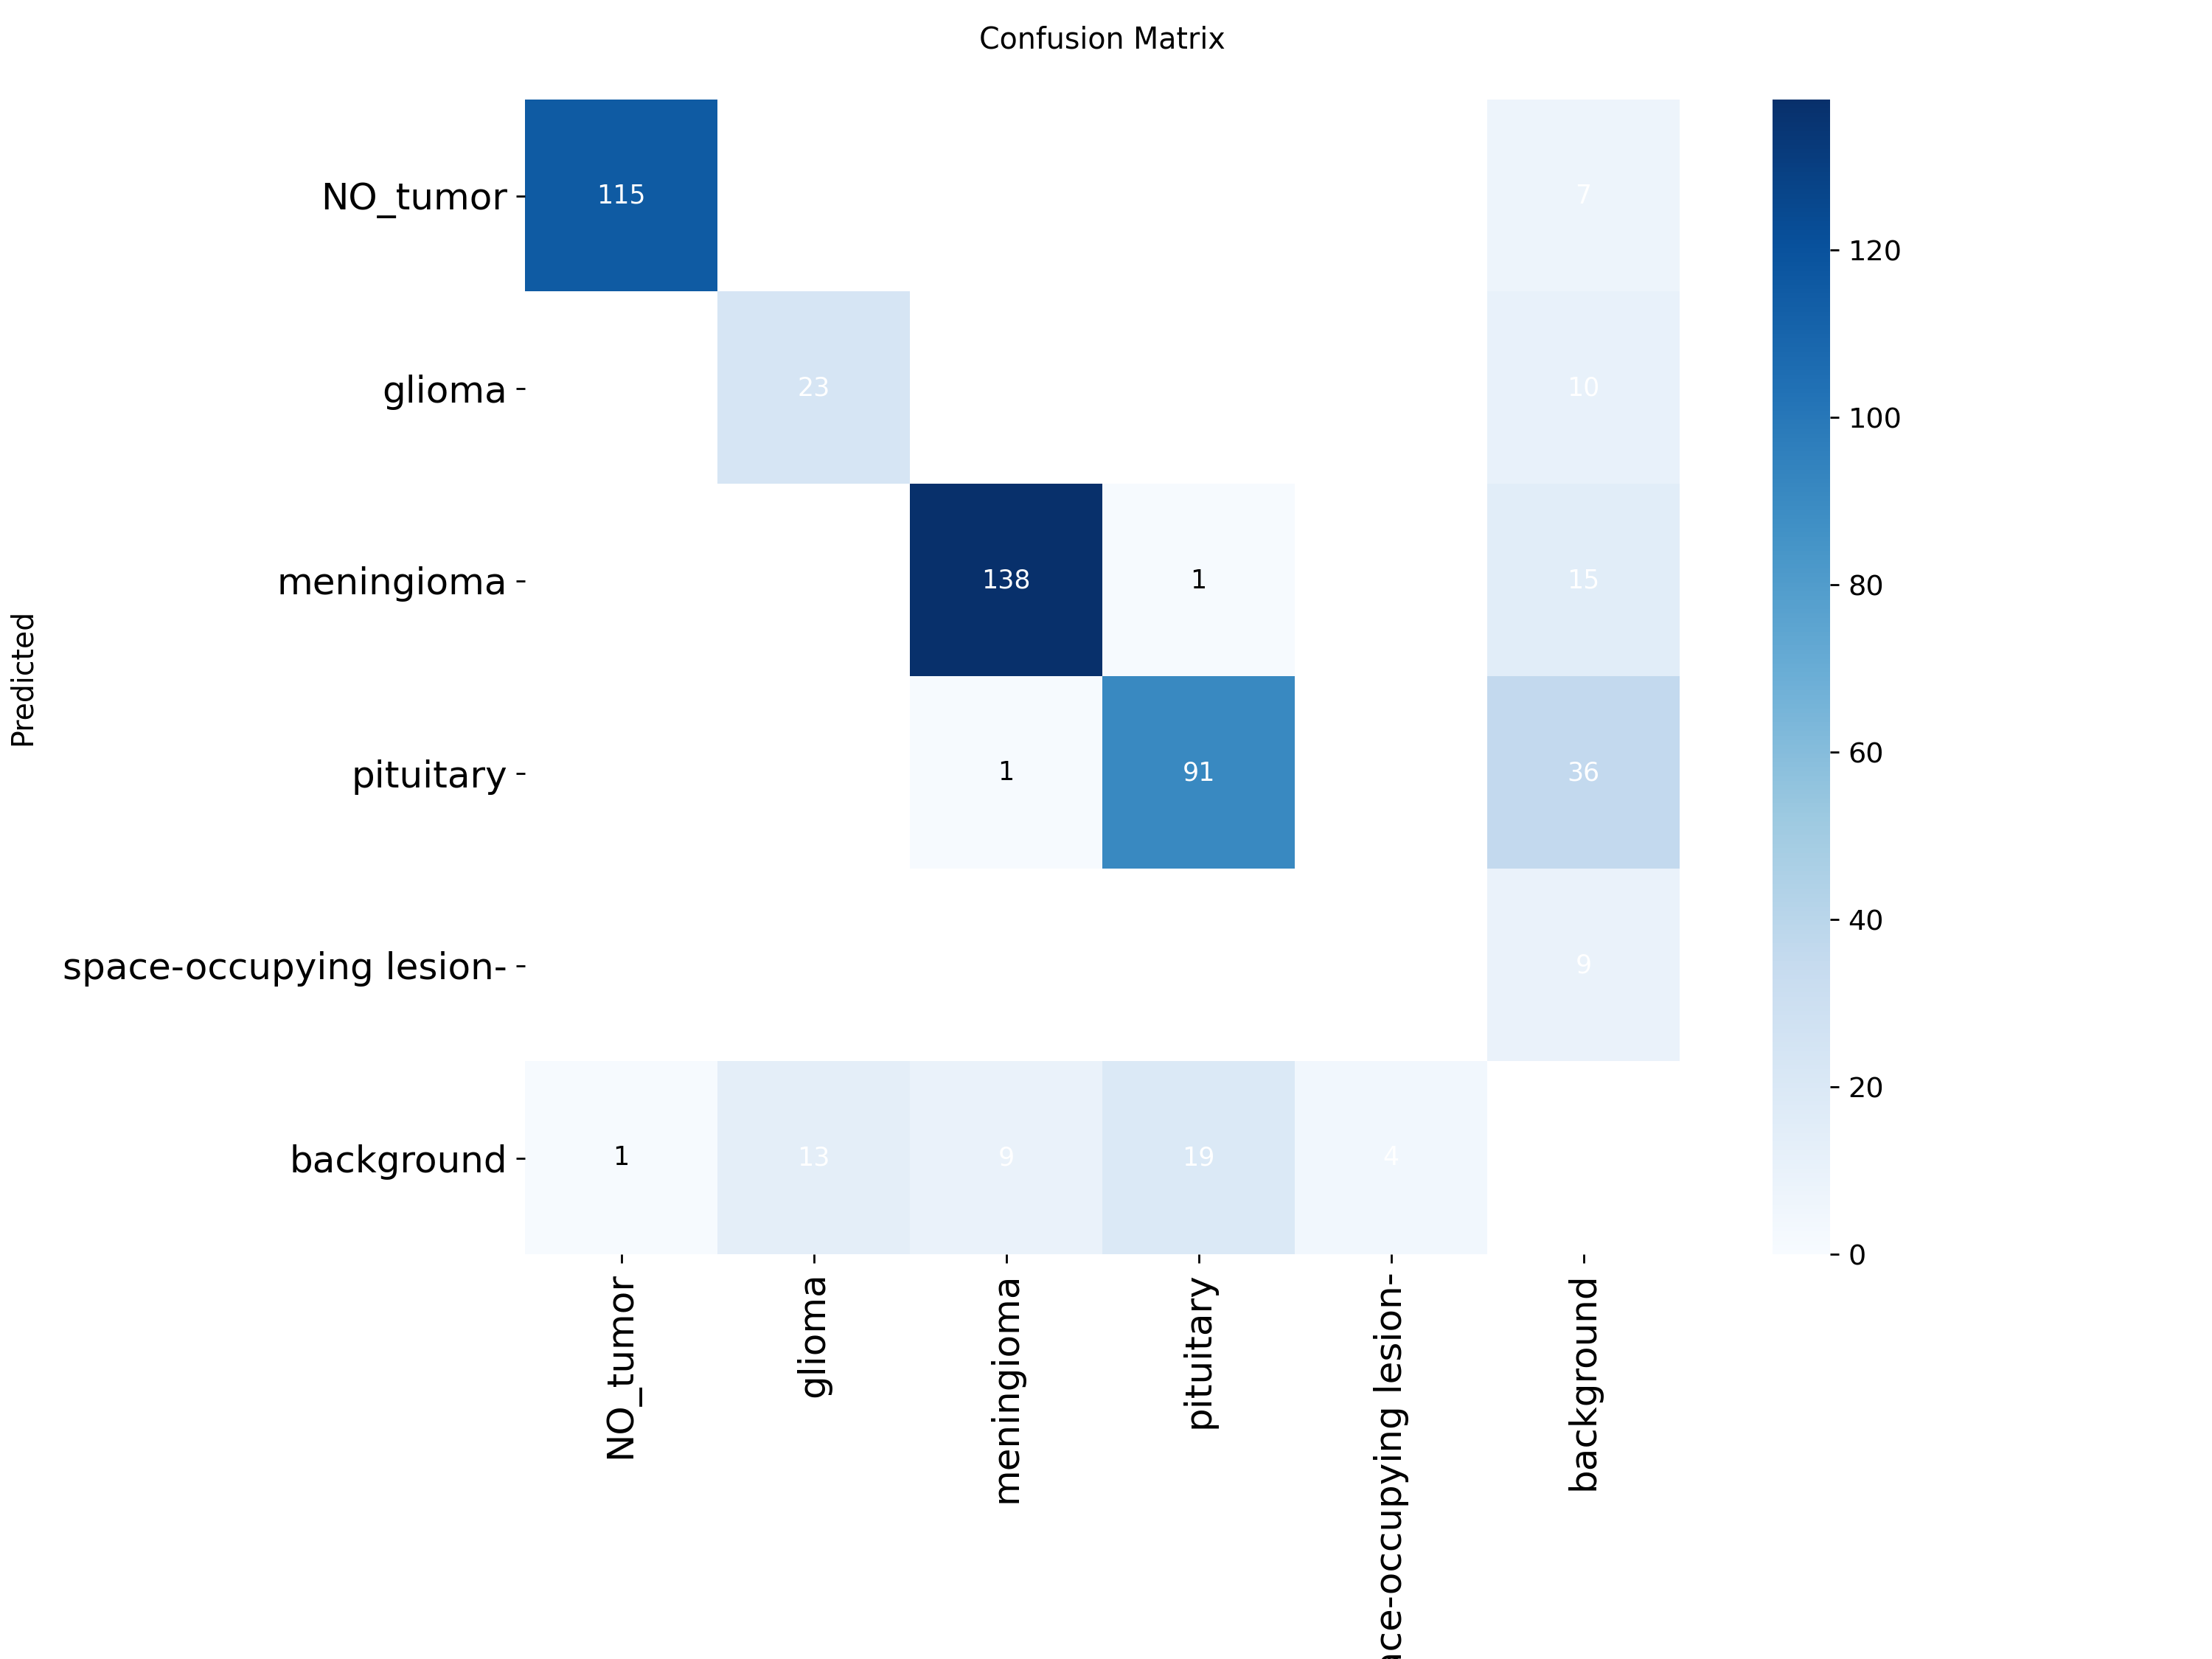

In [ ]:
Image('/content/runs/detect/train2/confusion_matrix.png', width=600)

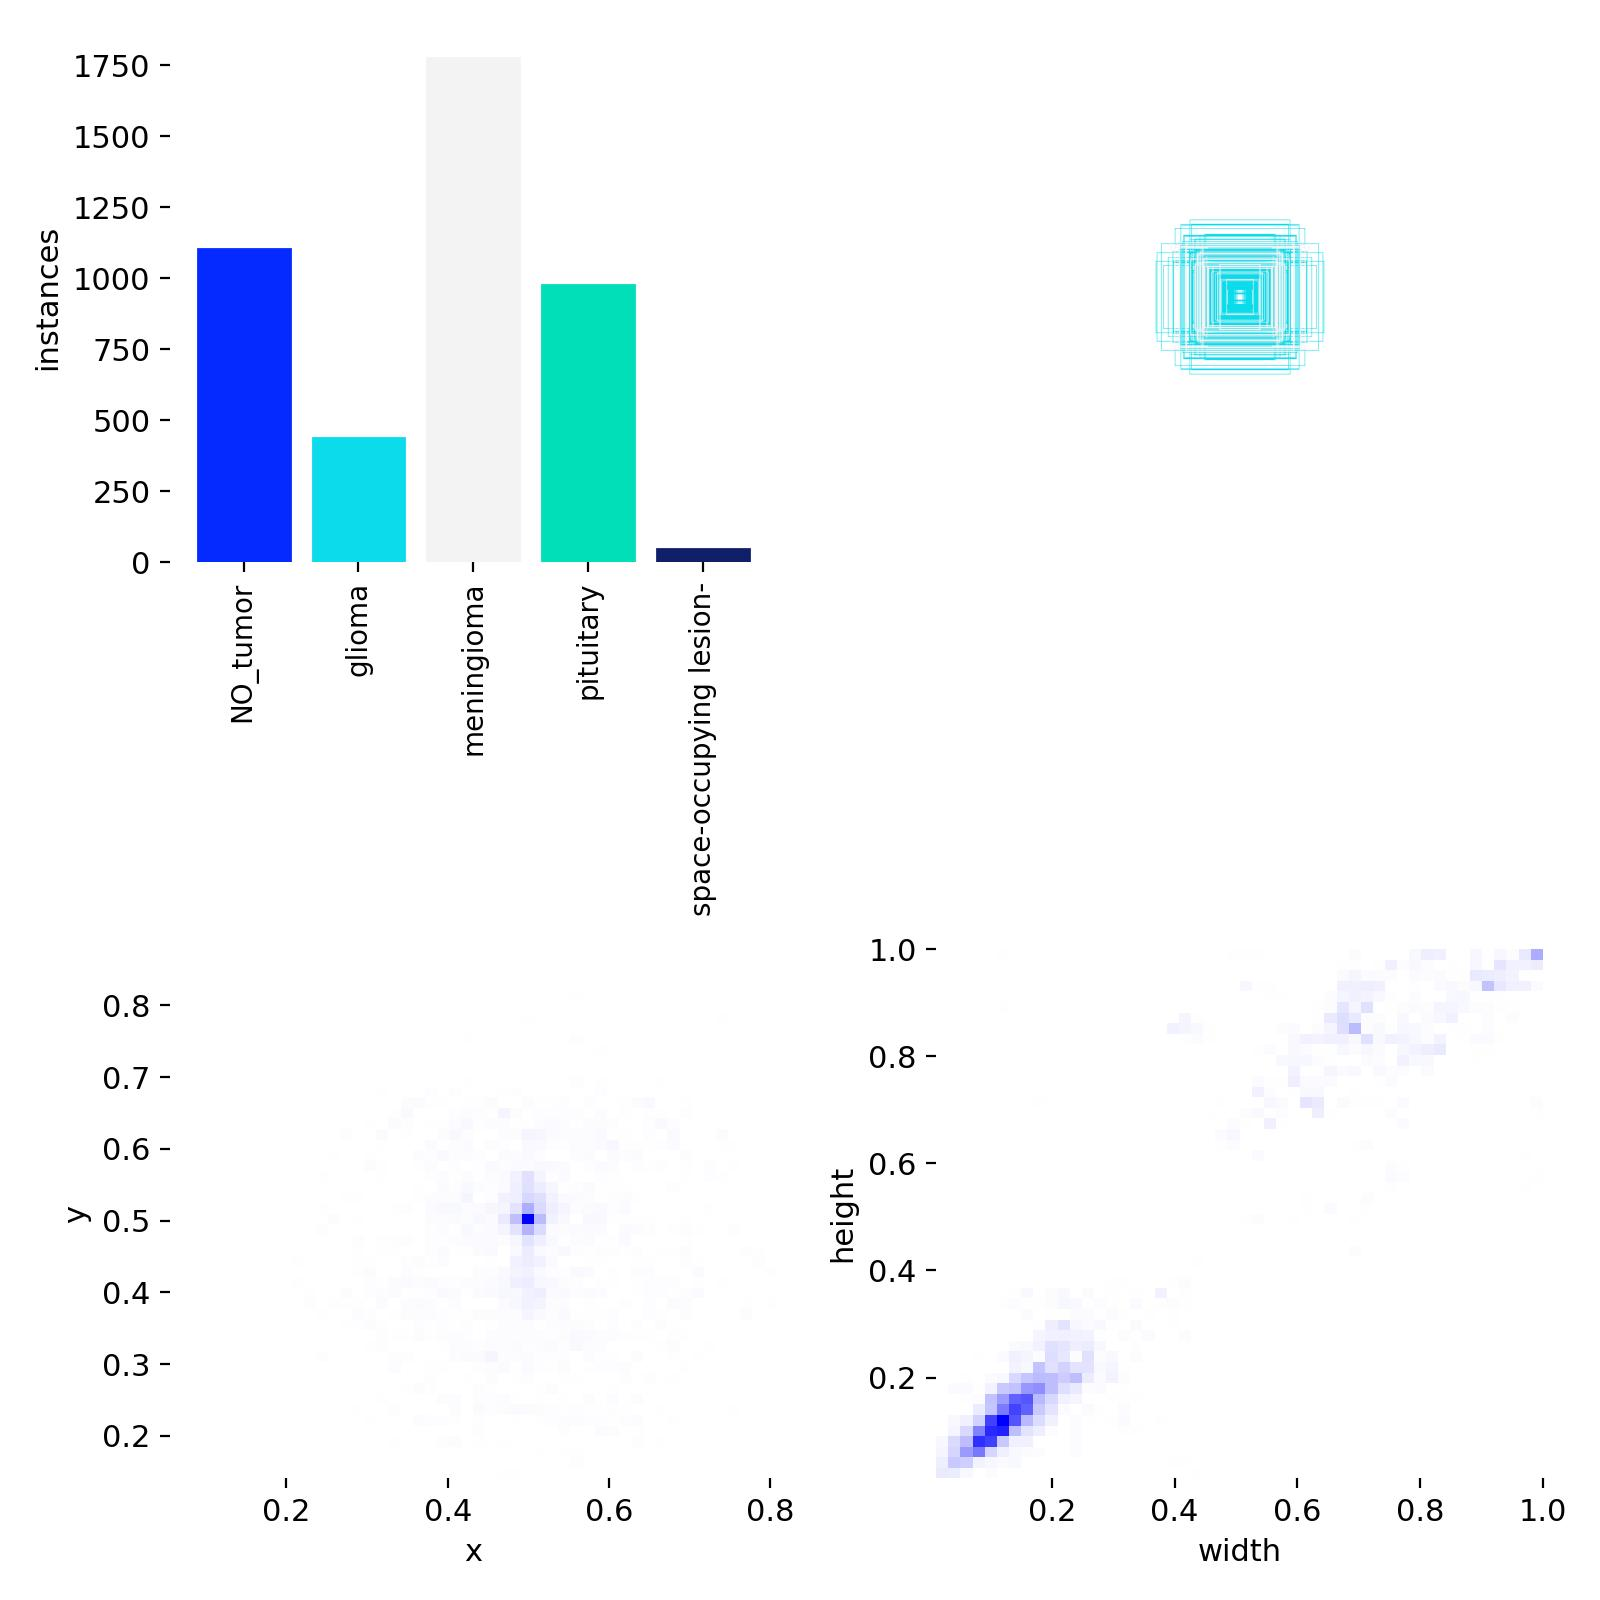

In [ ]:
Image('/content/runs/detect/train2/labels.jpg', width=600)

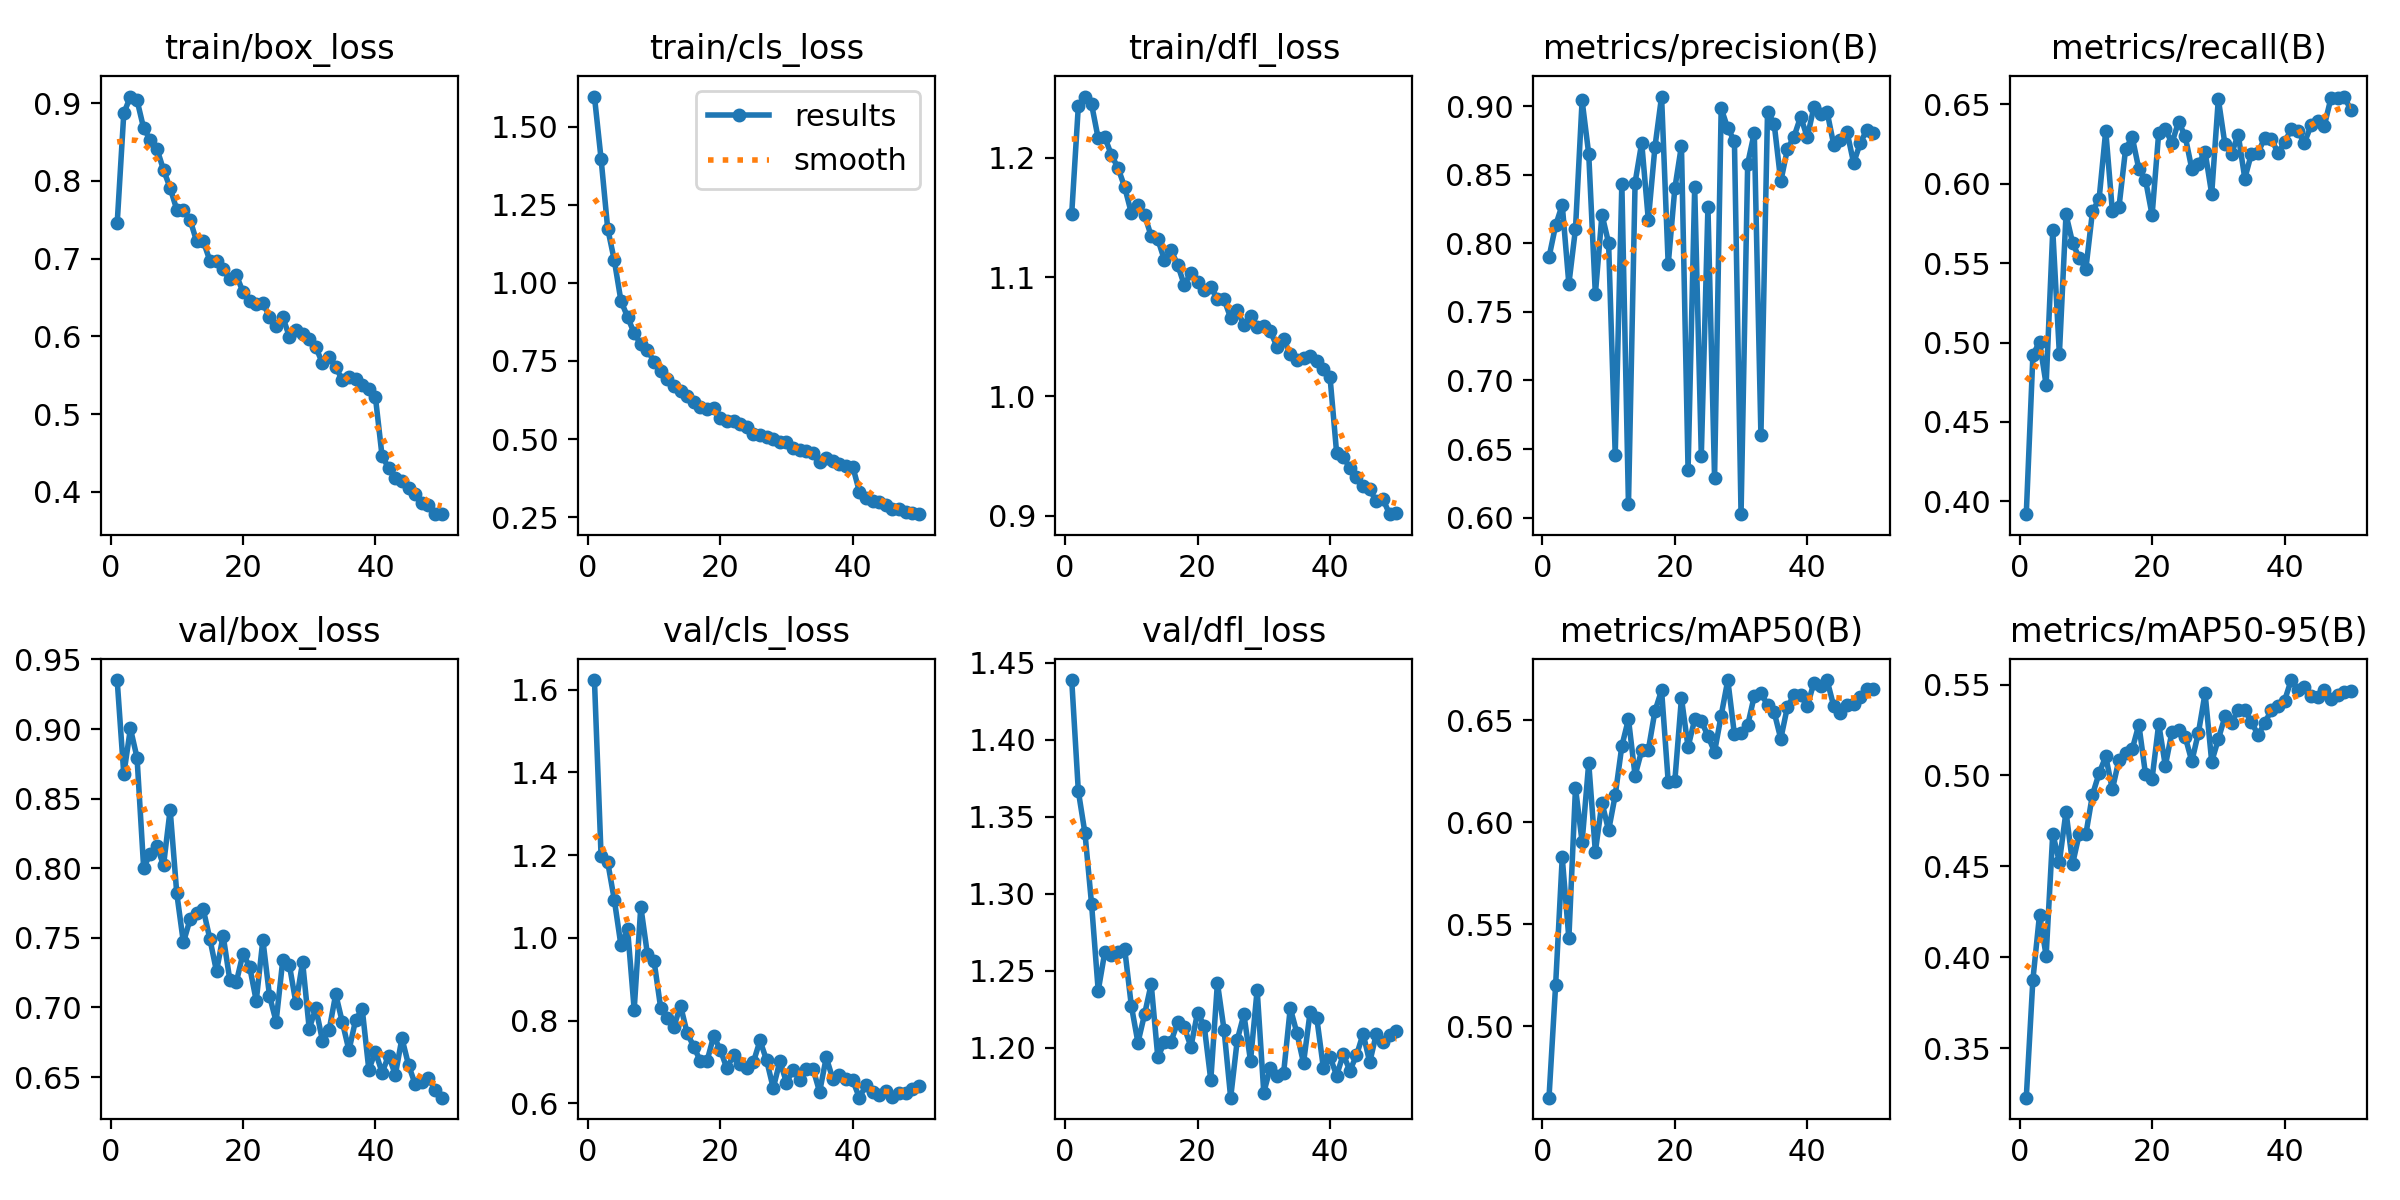

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

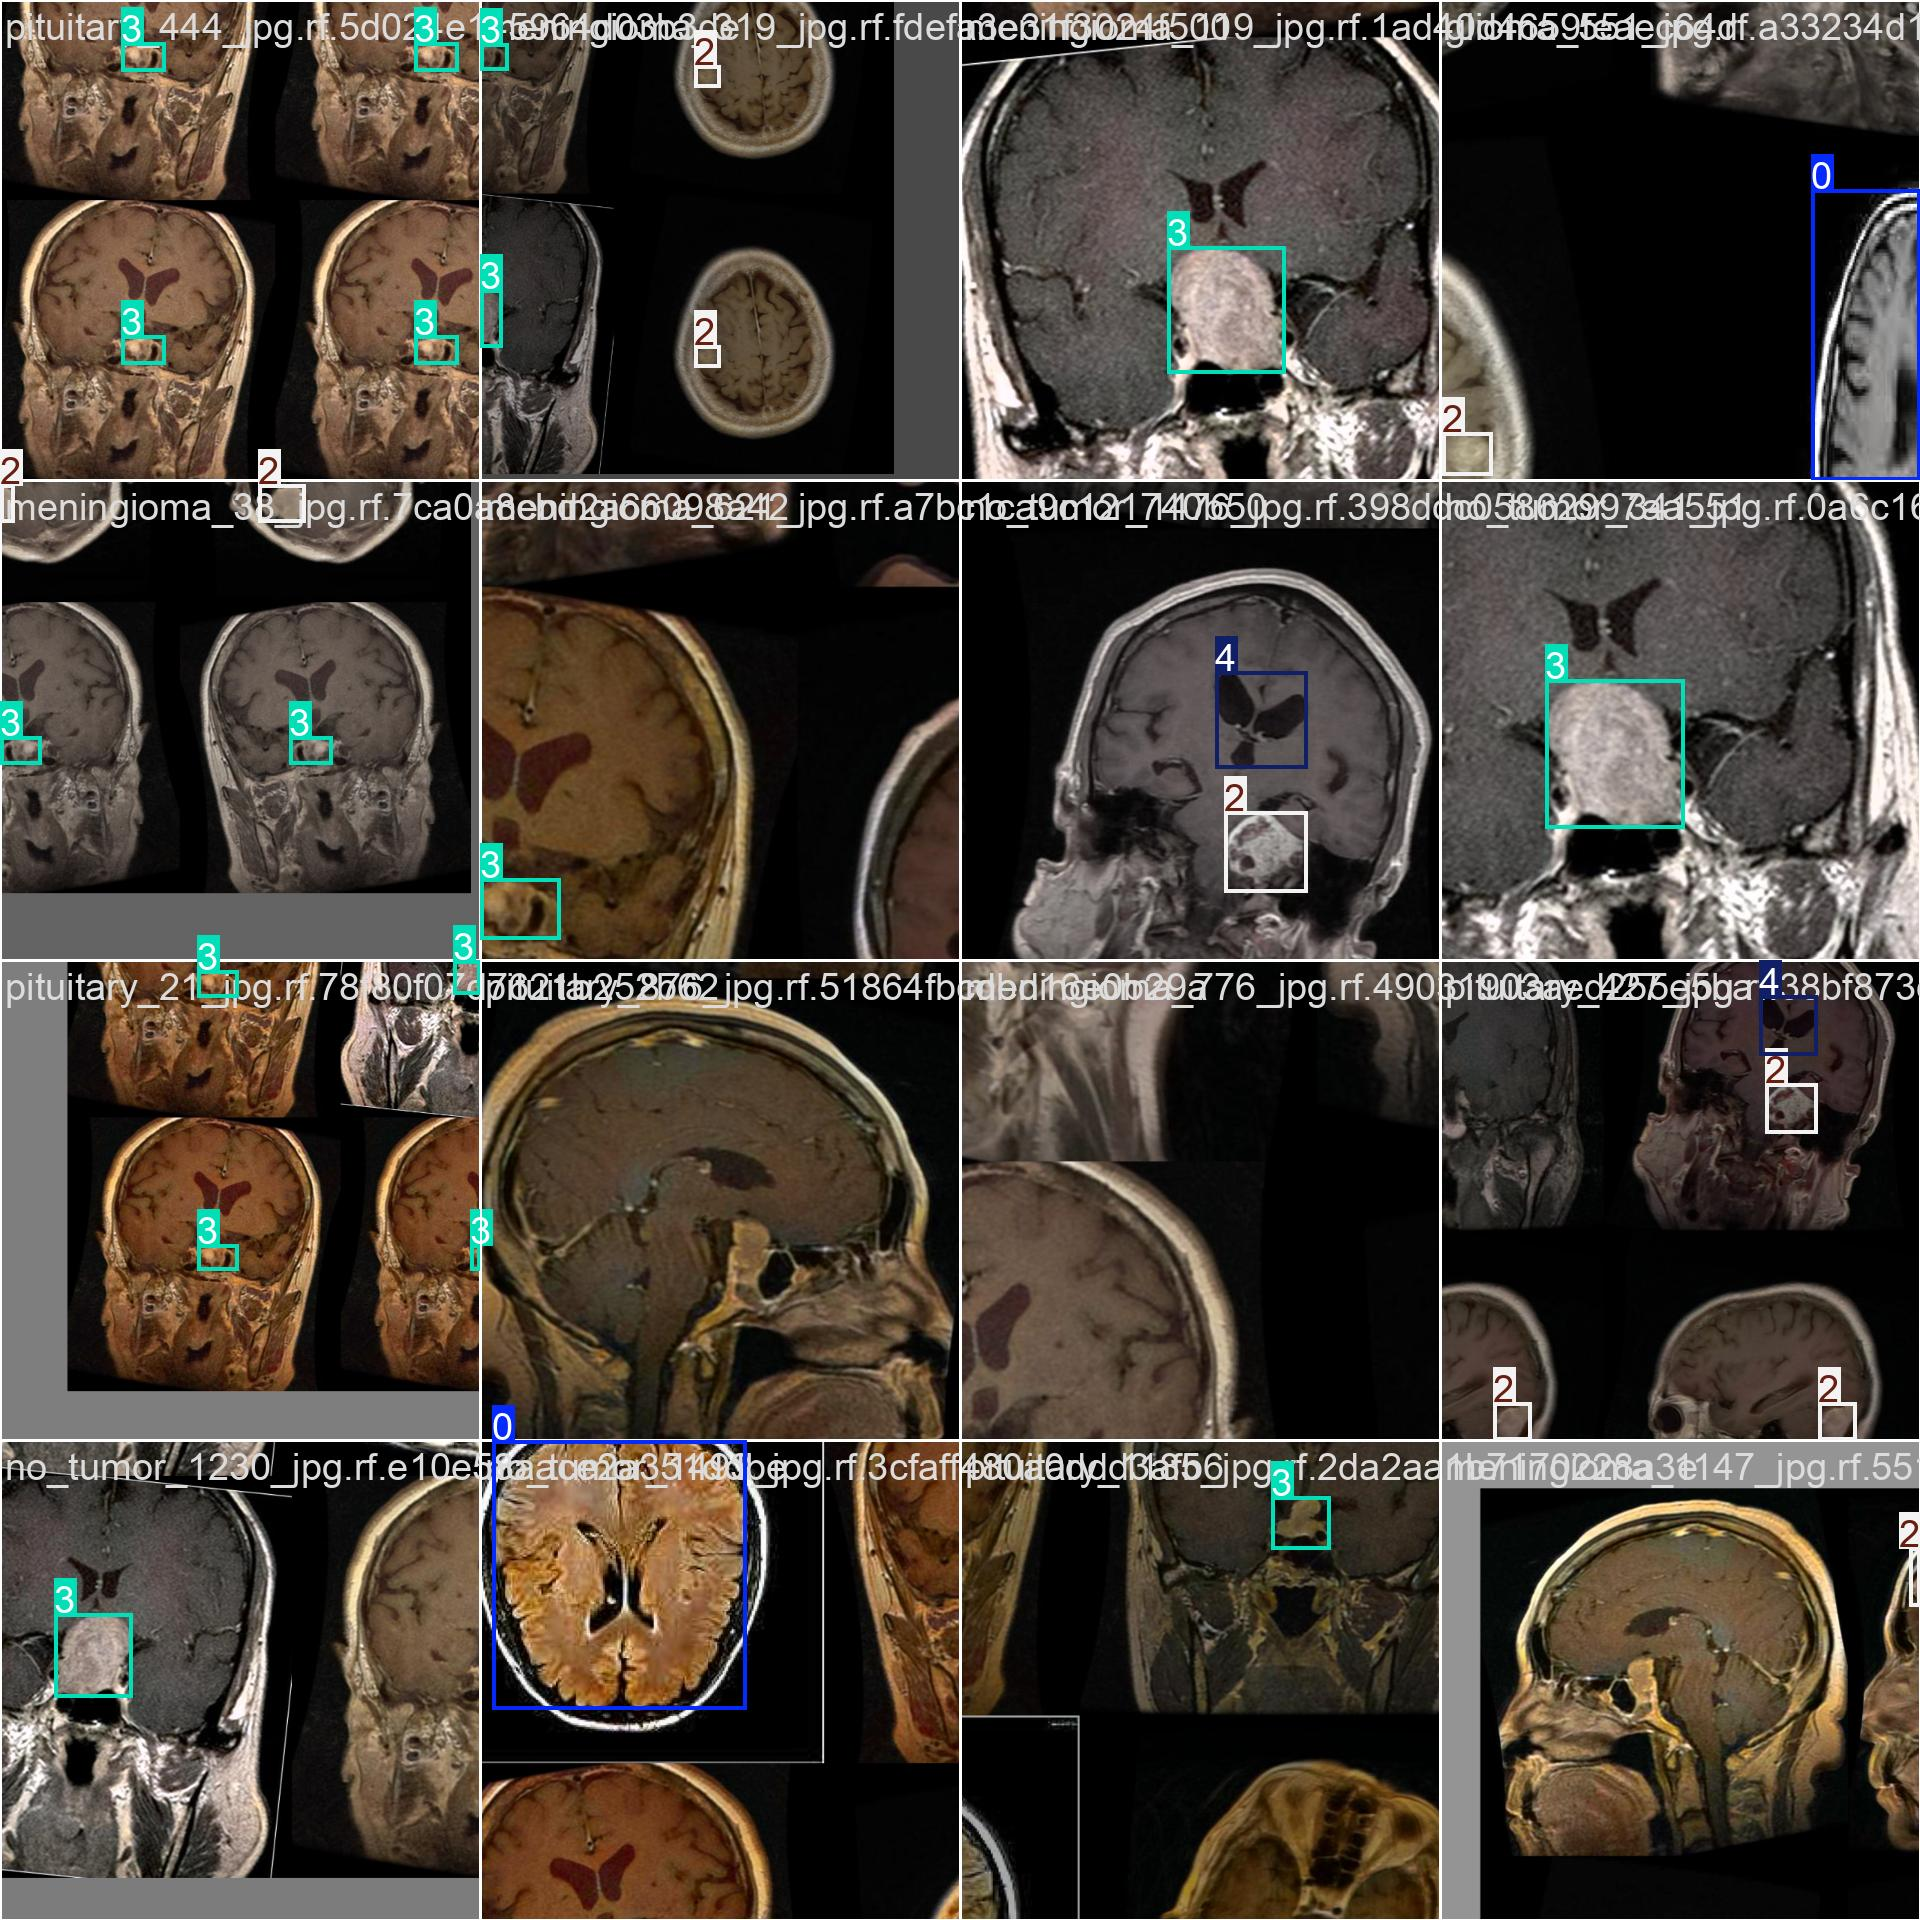

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

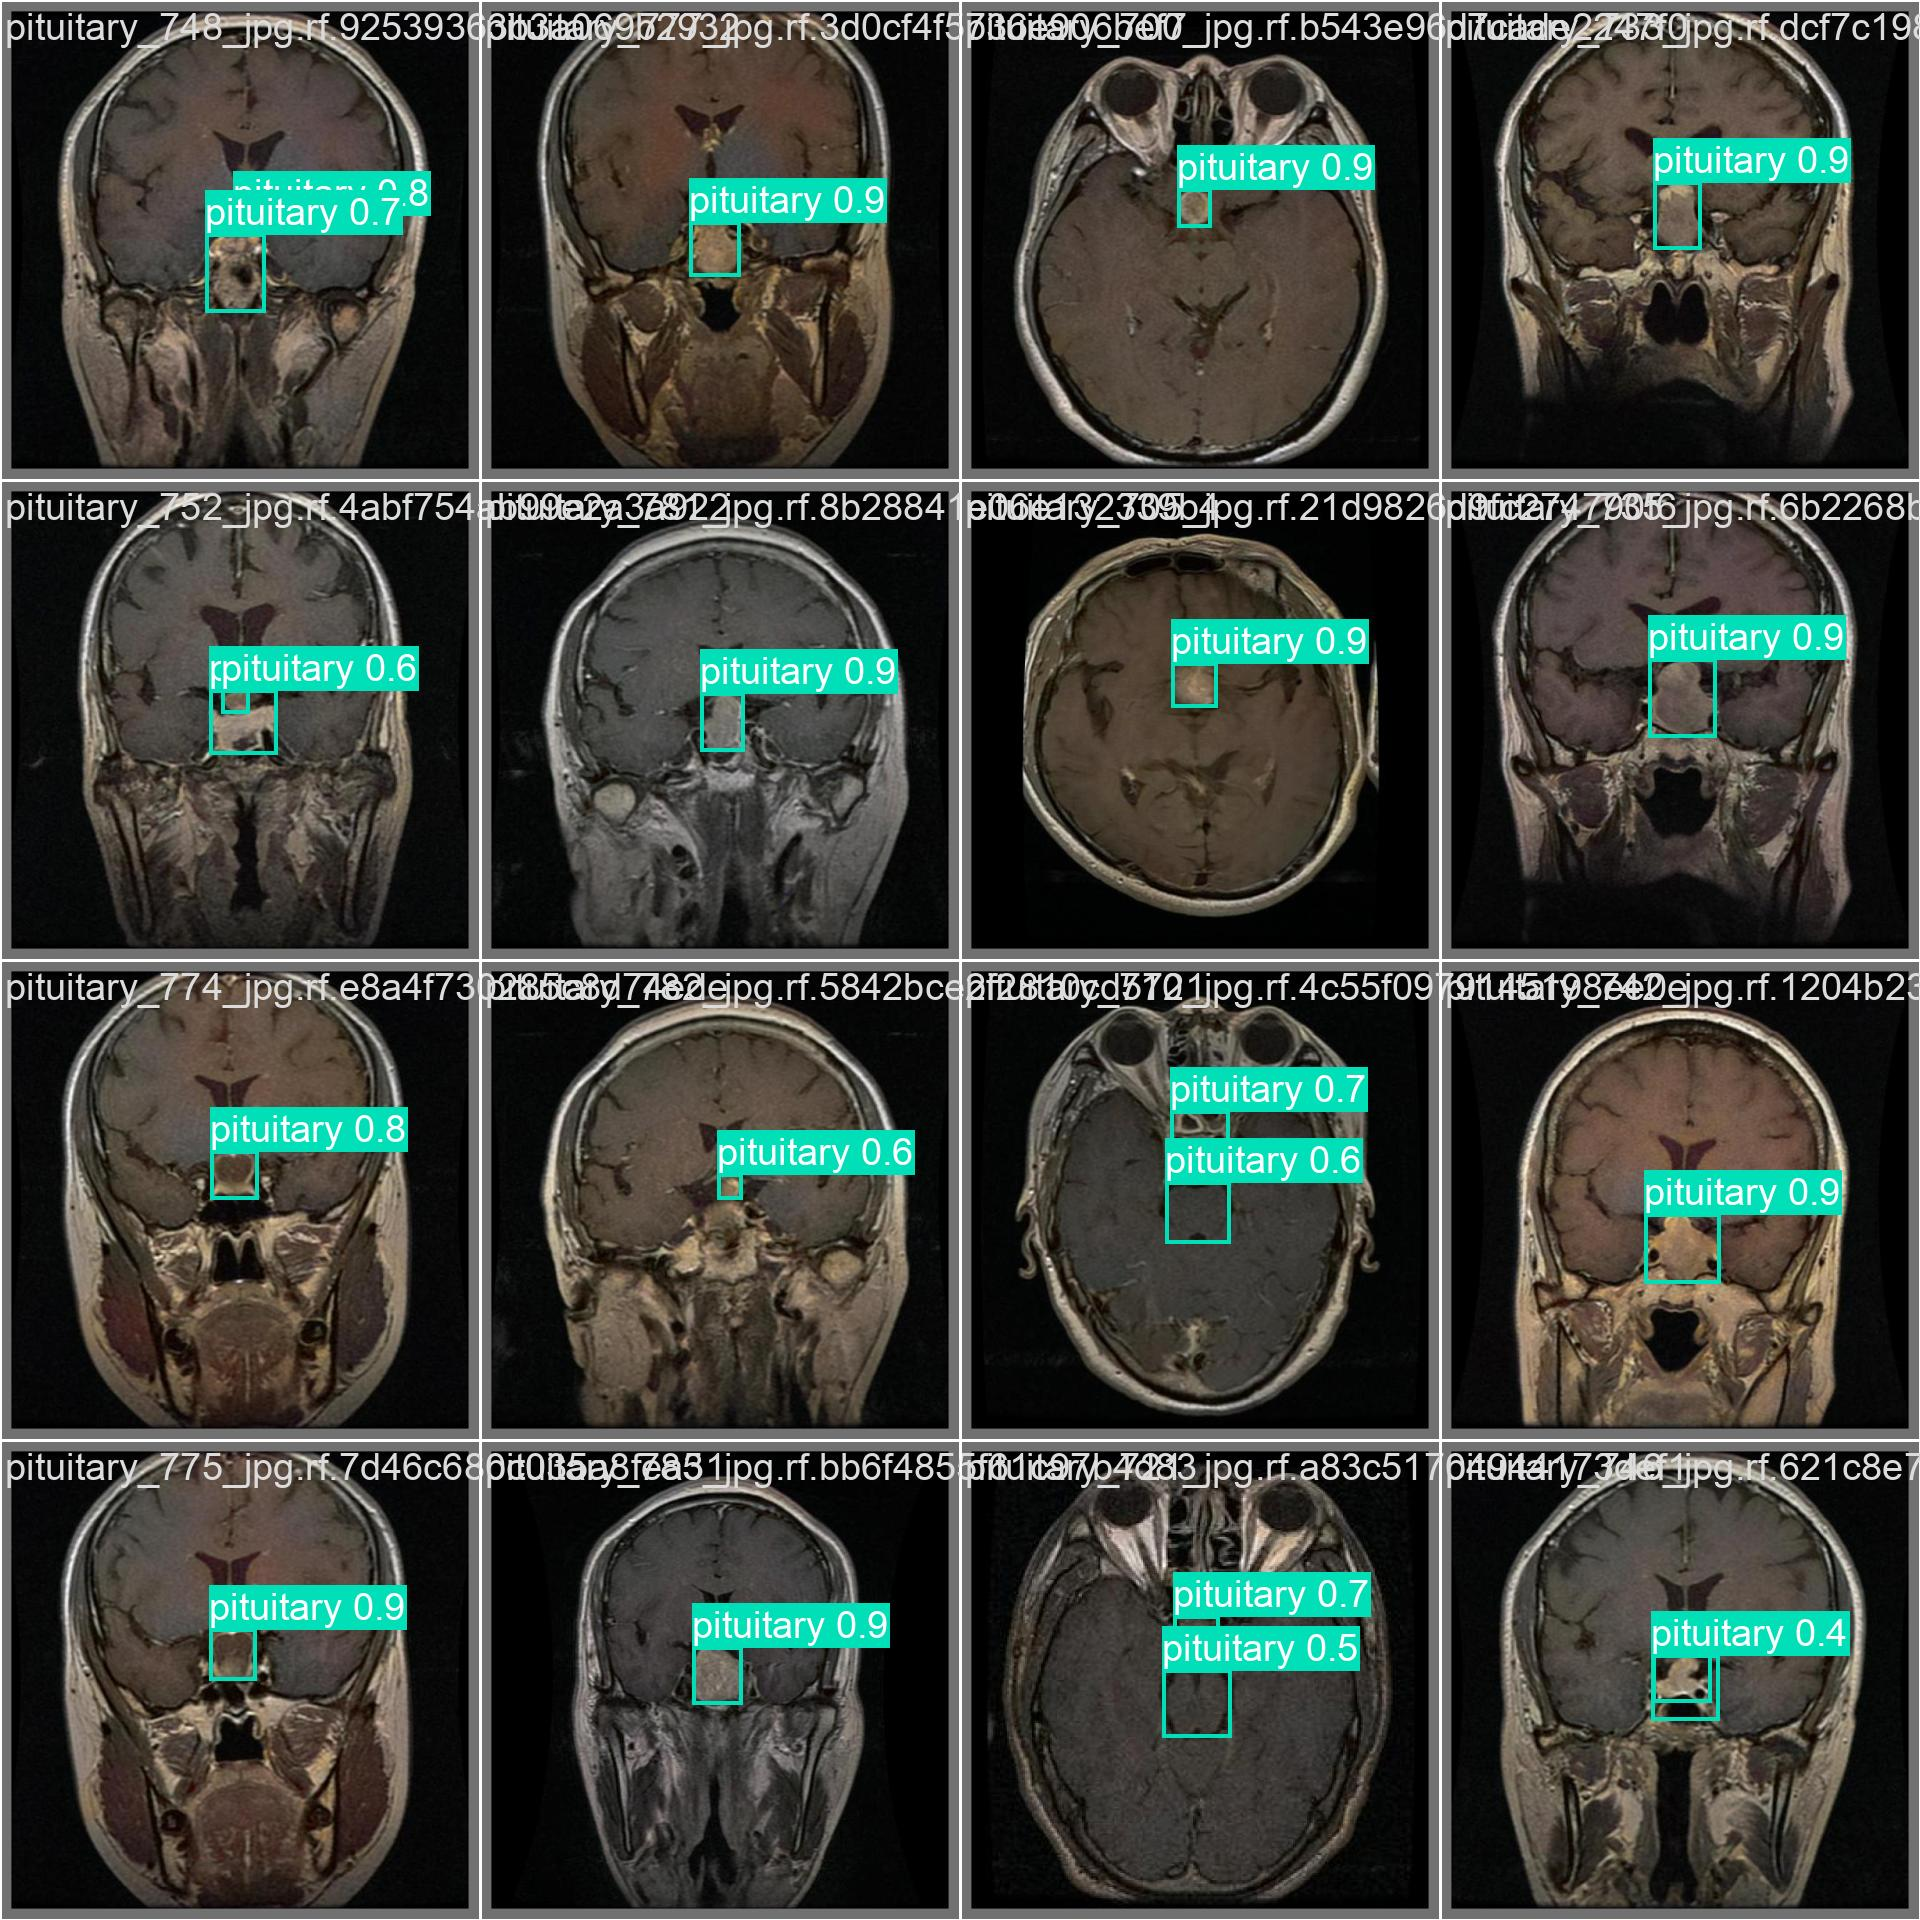

In [ ]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

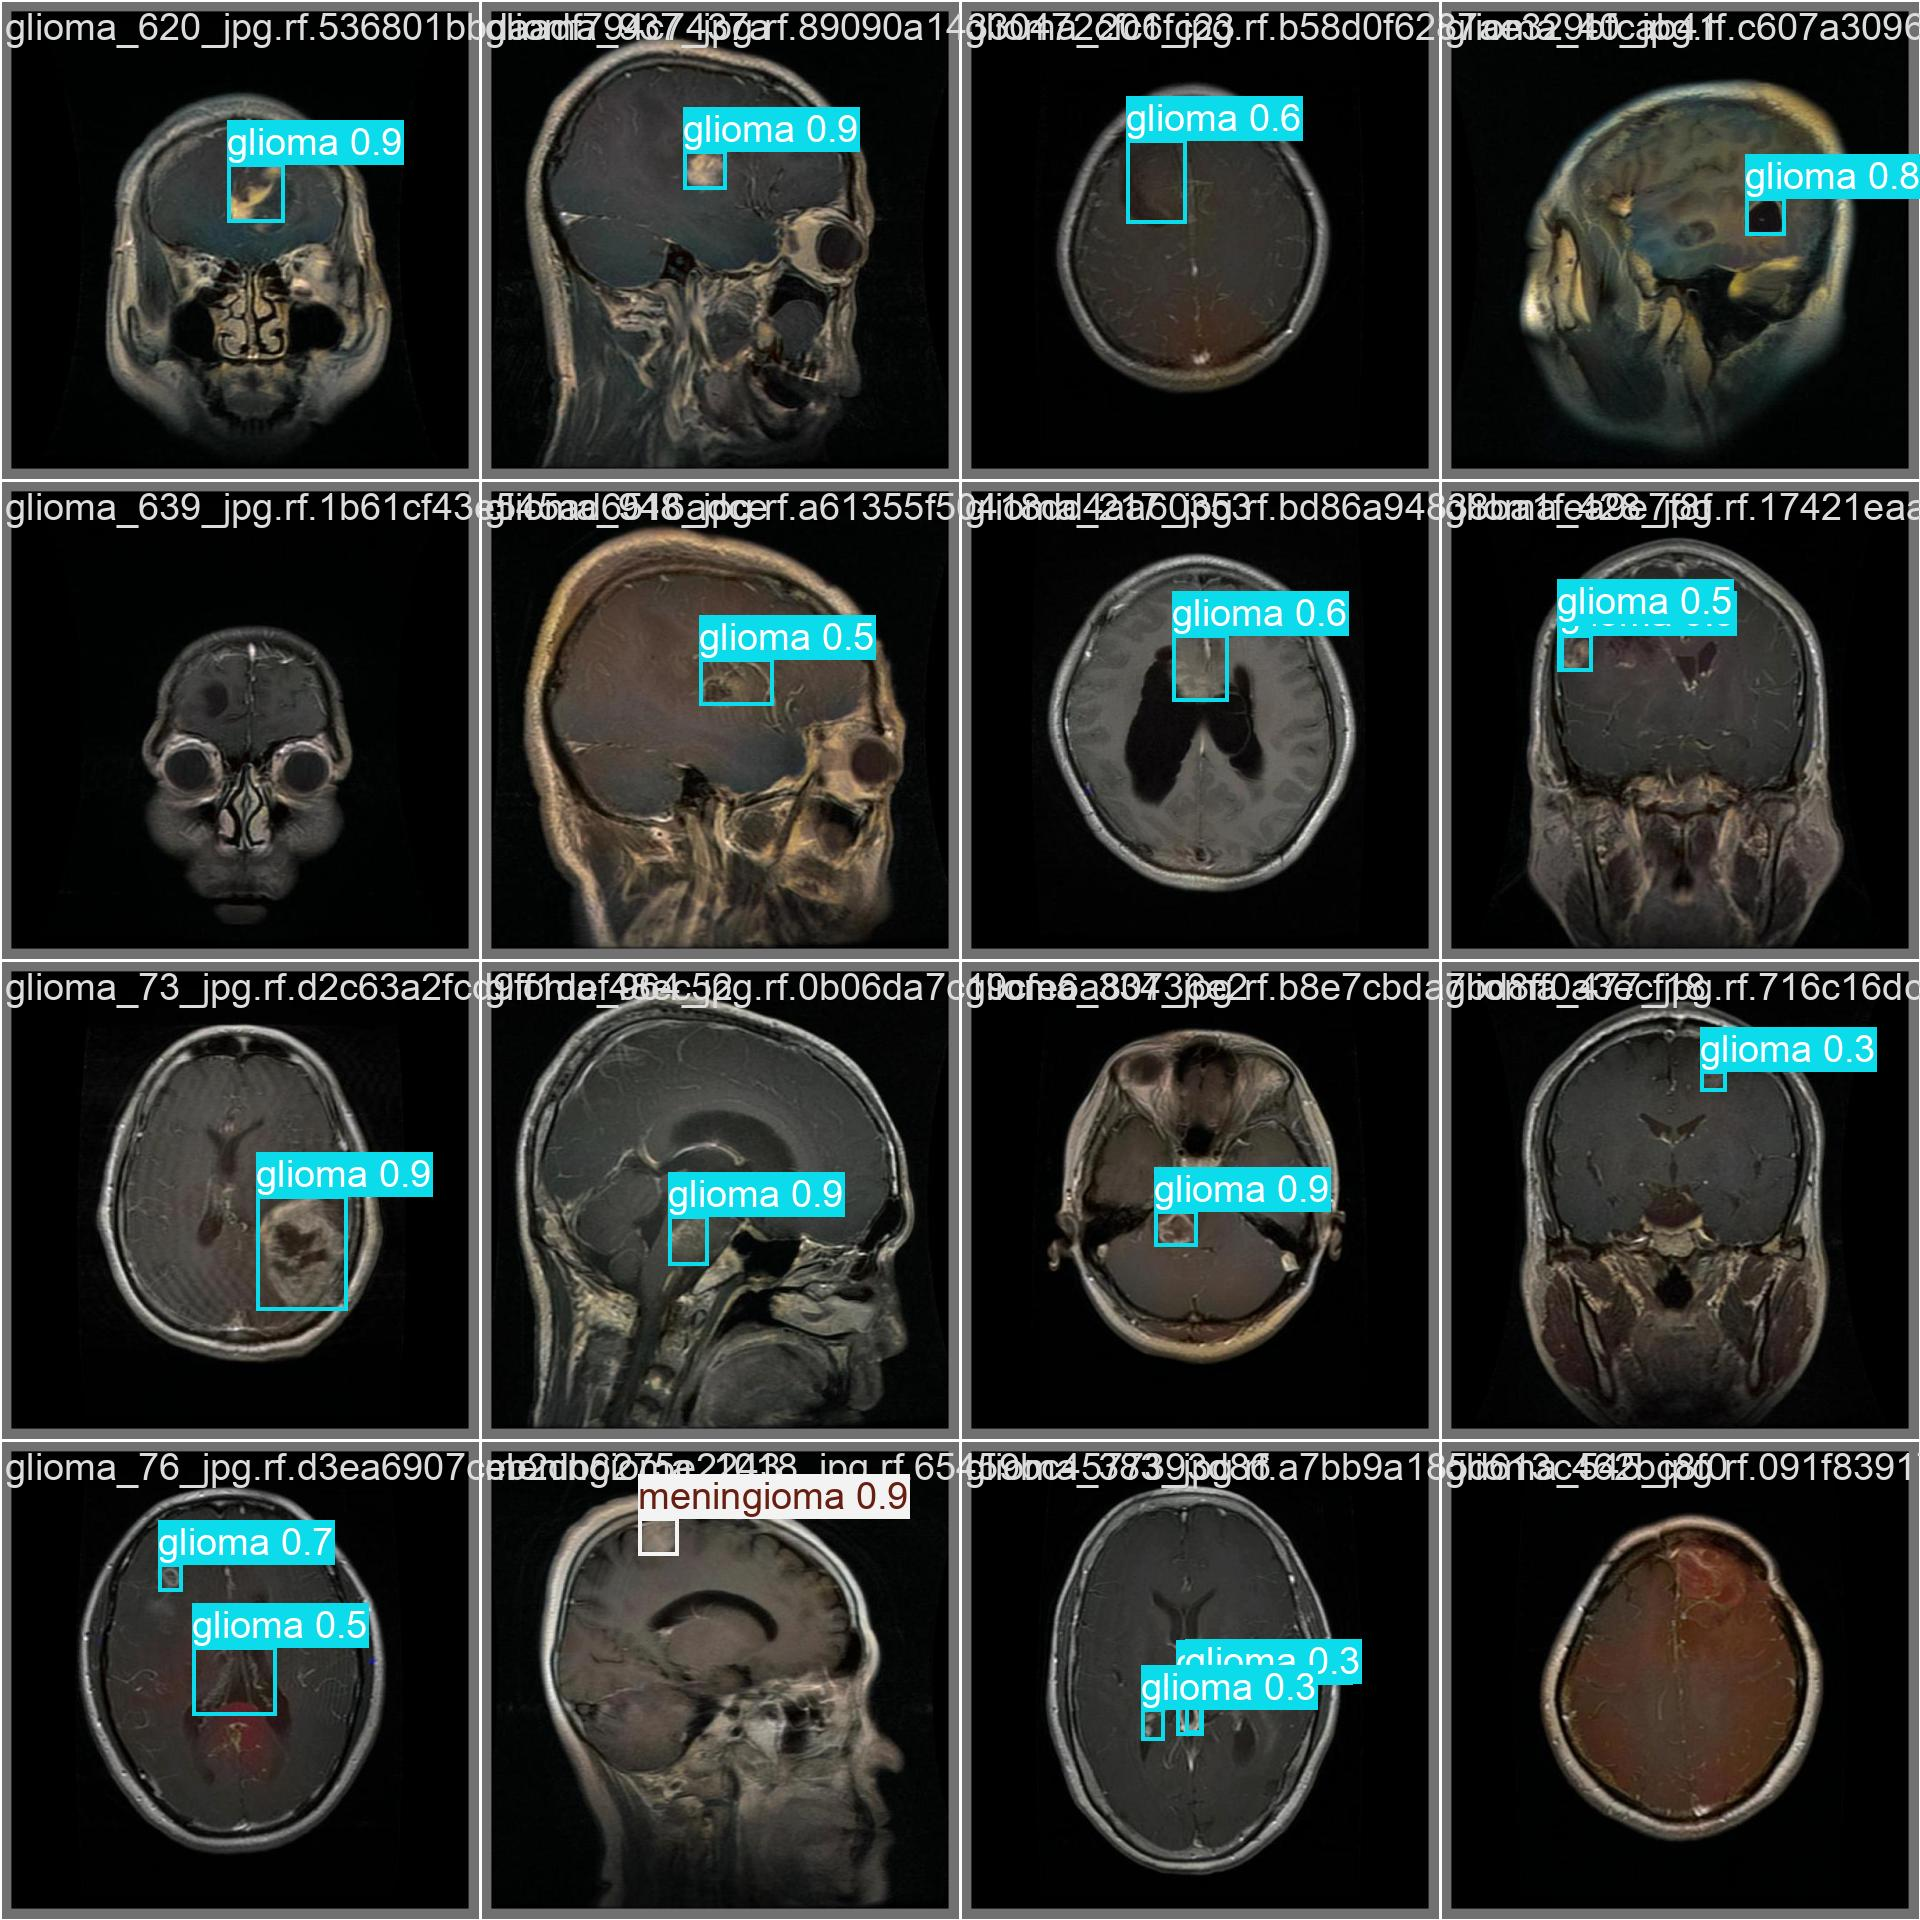

In [ ]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg", width=600)